In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import scipy

# matplotlib.style.use('ggplot')
# pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
data_rating = pd.io.parsers.read_csv('raw/rating.csv')
# data_rating = data_rating.loc[data_rating['user_id'] != 48766]
data_anime = pd.io.parsers.read_csv('raw/anime.csv')

train_rating = pd.io.parsers.read_csv('omer/rating_train.csv')
test_rating = pd.io.parsers.read_csv('omer/rating_test.csv')

print "Animes: "
print data_anime.describe()

print "\nRatings: "
print data_rating.describe()

Animes: 
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

Ratings: 
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [18]:
data_anime[60:61]

,anime_id,name,genre,type,episodes,rating,members
60,10408,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",Movie,1,8.61,197439


In [16]:
data_rating[153:156]

,user_id,anime_id,rating
153,2,11771,10
154,2,12189,-1
155,2,16417,-1


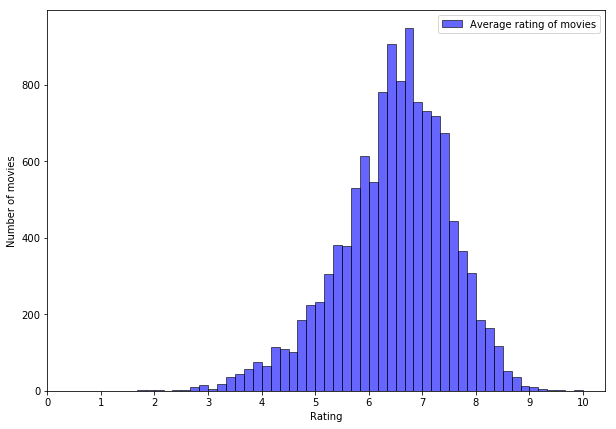

In [38]:
plt.subplots(figsize = (10,7))
plt.hist(data_anime['rating'].dropna(), bins=50, label="Average rating of movies", color="b", alpha=0.6, edgecolor="k")
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.legend()
plt.xticks(np.arange(0, 11))
plt.show()

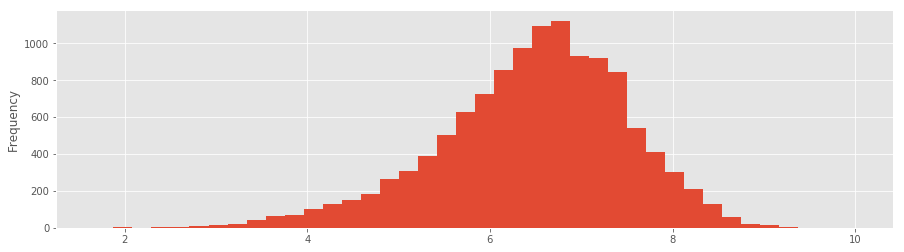

In [25]:
data_anime['rating'].plot(kind="hist", bins=40,figsize=(15,4))
plt.show()

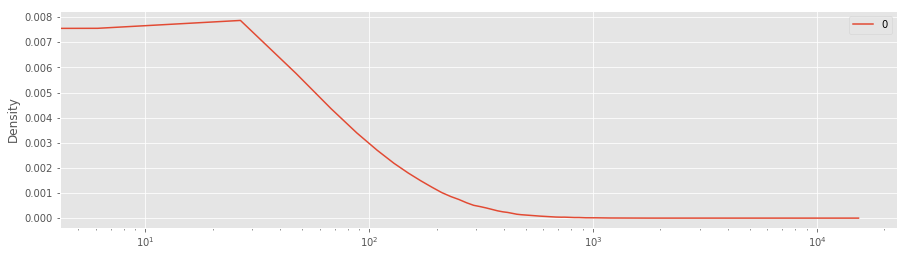

In [26]:
data_rating.groupby('user_id').size().to_frame().sort_values(by=0).plot(kind="density", logx=True, figsize=(15,4))
plt.show()

Anime rating:
count              12,064.00
mean                    6.47
std                     1.03
min                     1.67
25%                     5.88
50%                     6.57
75%                     7.18
max                    10.00
Name: rating, dtype: float64

Rating: TV
count               3,671.00
mean                    6.90
std                     0.86
min                     2.67
25%                     6.44
50%                     6.94
75%                     7.46
max                     9.60
Name: rating, dtype: float64

Rating: OVA
count               3,285.00
mean                    6.38
std                     0.86
min                     2.00
25%                     5.85
50%                     6.38
75%                     6.92
max                     9.25
Name: rating, dtype: float64

Rating: Movie
count               2,297.00
mean                    6.32
std                     1.21
min                     1.92
25%                     5.42
50%               

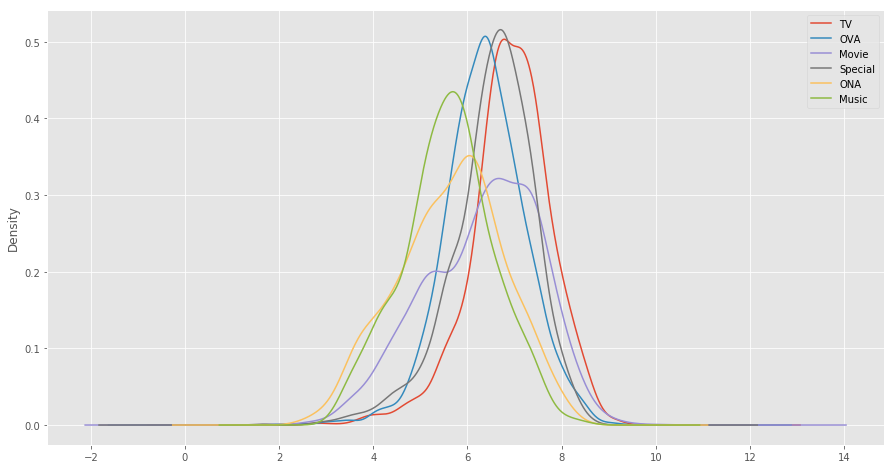

In [27]:
print 'Anime rating:'
print data_anime['rating'].describe(include='all')

for t in ['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music']:
    print '\nRating: ' + t
    print data_anime.loc[data_anime['type'] == t]['rating'].describe(include='all')
    data_anime.loc[data_anime['type'] == t]['rating'].plot(kind="density", figsize=(15,8))

L=plt.legend()
for i, t in enumerate(['TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music']):
    L.get_texts()[i].set_text(t)

plt.show()

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space', 'Sports', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi']
37
12294
43
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']

set(['Josei', 'Police', 'Yuri', 'Shounen Ai', 'Super Power', 'Shoujo Ai'])


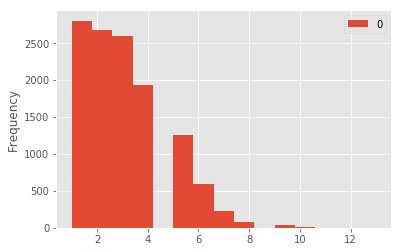

In [163]:
_genre = data_anime['genre']
_genre_list = []
genre_count = []
unique_genre = []
for g in _genre:
    try:
        gs = g.split(',')
        if len(gs) == 1:
            unique_genre.extend(gs)
        _genre_list.extend(map(lambda s: s.strip(), gs))
        genre_count.append(gs)
    except:
        pass
    
#print genre_count / len(data_anime) 

print sorted(set(unique_genre))
print len(sorted(set(unique_genre)))

print len(data_anime) 
print len(sorted(set(_genre_list)))
print sorted(set(_genre_list))
print
print set(_genre_list) - set(unique_genre)

pd.DataFrame(map(lambda x: len(x), genre_count)).plot(kind='hist', bins=15)
plt.show()

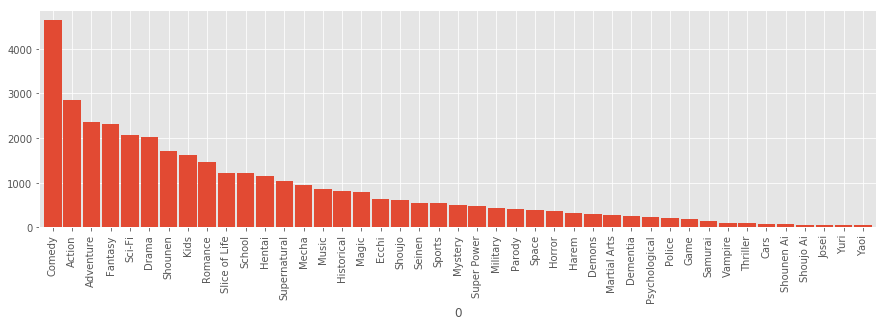

In [29]:
genre_count = pd.DataFrame(_genre_list).groupby(0)
genre_count.size().sort_values(ascending=False).plot(kind="bar", width=0.9, figsize=(15,4))
plt.show()

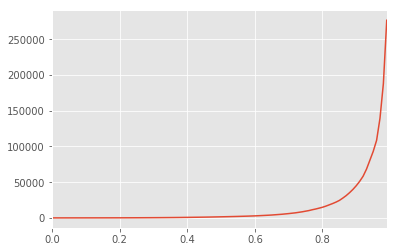

In [30]:
members = data_anime['members'].cumsum()

data_anime['members'].quantile(np.arange(0.0, 1.0, 0.01)).plot(kind="line")
plt.show()

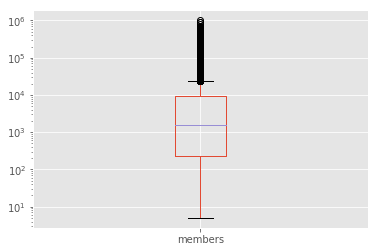

In [32]:
data_anime['members'].plot(kind="box", logy=True)
plt.show()

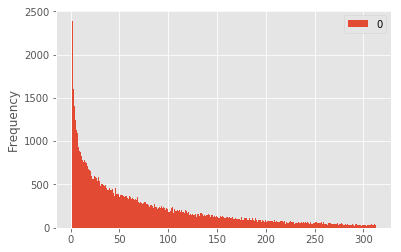

In [44]:
movies = data_rating.groupby('user_id').size().to_frame().sort_values(by=0)
movies.loc[movies[0] < 314].describe()
movies.loc[movies[0] < 314].plot(kind="hist", bins=313)
plt.show()

In [196]:
def normalize(df_user_profiles):
    x = df_user_profiles.iloc[:,1:-1].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    
    x_scaled = min_max_scaler.fit_transform(x.T)
    print x_scaled.T
    print df_user_profiles['user_id']
    #_df_user_profiles = pd.concat([df_user_profiles['user_id'], 
    #                              pd.DataFrame(x_scaled.T, columns=df_user_profiles.columns[1:-1])], axis=1)
    
    _df_user_profiles = [df_user_profiles['user_id'].join(pd.DataFrame(x_scaled.T, columns=df_user_profiles.columns[1:-1])) 
    
    _df_user_profiles['avg_genre'] = df_user_profiles['avg_genre'].apply(func=lambda x: x /10.0)
    return _df_user_profiles

def get_user_profile(user_id, df_rating, data_anime):
    df_anime_genres = pd.get_dummies(data_anime['genre'].str.get_dummies(sep=", ")) # creates genre vectors
    df_anime_vector = pd.concat([data_anime['anime_id'], df_anime_genres], axis=1)
    
    df_user = df_rating.loc[df_rating['user_id'] == user_id]
    df_merged = pd.merge(df_user, df_anime_vector, how='left', left_on='anime_id', right_on='anime_id' 
                        ).drop(['anime_id', 'rating'], axis=1)

    avg_genre = df_merged[df_merged.columns.difference(['user_id'])].sum(axis=1)
    
    # Count only 1's
    df_user_sum = df_merged.apply(pd.Series.value_counts).loc[df_merged.index == 1]
    df_user_sum.fillna(0, inplace = True)
    df_user_sum = df_user_sum.apply(func=lambda x: x**2,axis=0)
    df_user_sum.user_id = user_id
    df_user_sum['avg_genre'] = avg_genre.sum() / float(len(avg_genre))
    return df_user_sum

In [195]:
profile = get_user_profile(1, train_rating, data_anime)
print profile
print normalize(profile)

   user_id  Action  Adventure                 Cars  Comedy  \
1        1    3481        121                 0.00    5776   

              Dementia  Demons  Drama  Ecchi  Fantasy         ...           \
1                 0.00     144    676   2601     1444         ...            

   Slice of Life                Space               Sports  Super Power  \
1             36                 0.00                 0.00          144   

   Supernatural             Thriller  Vampire                 Yaoi  \
1          2209                 0.00       36                 0.00   

                  Yuri            avg_genre  
1                 0.00                 5.28  

[1 rows x 45 columns]
[[  6.02666205e-01   2.09487535e-02   0.00000000e+00   1.00000000e+00
    0.00000000e+00   2.49307479e-02   1.17036011e-01   4.50311634e-01
    2.50000000e-01   6.23268698e-03   5.23718837e-01   0.00000000e+00
    6.92520776e-04   6.23268698e-03   0.00000000e+00   0.00000000e+00
    3.39335180e-02   1.55817175

ValueError: Shape of passed values is (43, 1), indices imply (44, 1)